## Problem statement

In the competitive landscape of Airbnb rentals, potential customers often struggle to find suitable accommodations that meet their preferences for pricing, availability,
and location.Simultaneously, property owners and managers need insights into market trends to optimize their pricing strategies and improve their listings' attractiveness.

This project seeks to address these challenges
By performing comprehensive data cleaning, developing interactive geospatial visualizations, and creating dynamic plots, the project aims to provide actionable insights
that will help customers find accommodations that fit their standards and assist property owners in making data-driven decisions to enhance their offerings.



In [1]:
# importing pandas as pd
import pandas as pd
# reading json file using path
df = pd.read_json("sample_airbnb.json")

In [2]:
# Cpnverting Json file into csv file for easy calculations
df.to_csv("sample_airbnb.csv")

In [3]:
print(f'The data set consist of {df.shape[0]} rows and {df.shape[1]} columns')

The data set consist of 5555 rows and 42 columns


In [4]:
# printing 5 rows for understanding the data
df.head()

,_id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,...,guests_included,images,host,address,availability,review_scores,reviews,weekly_price,monthly_price,reviews_per_month
0,1003530,https://www.airbnb.com/rooms/1003530,New York City - Upper West Side Apt,,"Murphy bed, optional second bedroom available....","Murphy bed, optional second bedroom available....",Great neighborhood - many terrific restaurants...,"My cat, Samantha, are in and out during the su...","Conveniently located near 1, 2, 3, B & C subwa...",New York City!,...,1,"{'thumbnail_url': '', 'medium_url': '', 'pictu...","{'host_id': '454250', 'host_url': 'https://www...","{'street': 'New York, NY, United States', 'sub...","{'availability_30': 0, 'availability_60': 0, '...","{'review_scores_accuracy': 10, 'review_scores_...","[{'_id': '4351675', 'date': '2013-04-29 04:00:...",NaN,NaN,NaN
1,10133554,https://www.airbnb.com/rooms/10133554,Double and triple rooms Blue mosque,,We are on the central city Blue mosque 5 minu...,We are on the central city Blue mosque 5 minu...,Cankurtaran mahallesi akbıyık caddesi no 22 Su...,,Tram 5 minutes metro 10 minutes Bus 10 minutes,"We have bathroom,wc,İnternet in rooms and unde...",...,1,"{'thumbnail_url': '', 'medium_url': '', 'pictu...","{'host_id': '52004703', 'host_url': 'https://w...","{'street': 'Fatih , İstanbul, Turkey', 'suburb...","{'availability_30': 30, 'availability_60': 60,...","{'review_scores_accuracy': 9, 'review_scores_c...","[{'_id': '149469150', 'date': '2017-05-04 04:0...",NaN,NaN,NaN
2,10059872,https://www.airbnb.com/rooms/10059872,"Soho Cozy, Spacious and Convenient","Clean, fully furnish, Spacious 1 bedroom flat ...",,"Clean, fully furnish, Spacious 1 bedroom flat ...",,,,,...,1,"{'thumbnail_url': '', 'medium_url': '', 'pictu...","{'host_id': '51624384', 'host_url': 'https://w...","{'street': 'Hong Kong, Hong Kong Island, Hong ...","{'availability_30': 0, 'availability_60': 0, '...","{'review_scores_accuracy': 10, 'review_scores_...","[{'_id': '56904633', 'date': '2015-12-19 05:00...",5000.0,NaN,NaN
3,10084023,https://www.airbnb.com/rooms/10084023,City center private room with bed,House is located 5mins walk from Sham Shui Po ...,"The house is old fashion type, and paint the w...",House is located 5mins walk from Sham Shui Po ...,"Cheapest food, electronic device, clothing and...",Deposit of $1000 will be charged and will retu...,"Close to 3 different MTR Station, Sham shui Po...","Living Room , Kitchen and Toilet, All cooking ...",...,1,"{'thumbnail_url': '', 'medium_url': '', 'pictu...","{'host_id': '51744313', 'host_url': 'https://w...","{'street': 'Hong Kong , 九龍, Hong Kong', 'subur...","{'availability_30': 14, 'availability_60': 24,...","{'review_scores_accuracy': 10, 'review_scores_...","[{'_id': '57191745', 'date': '2015-12-22 05:00...",1350.0,5000.0,NaN
4,10091713,https://www.airbnb.com/rooms/10091713,Surry Hills Studio - Your Perfect Base in Sydney,"This spacious, light filled studio has everyth...",Comfortable studio with a great layout. The ba...,"This spacious, light filled studio has everyth...",Surry Hills is a vibrant eclectic community an...,"WiFi, Apple TV with Netflix App (for use with ...",Travel Card 'Opal' travel cards work on all Sy...,You have full use of the entire studio and com...,...,1,"{'thumbnail_url': '', 'medium_url': '', 'pictu...","{'host_id': '13764143', 'host_url': 'https://w...","{'street': 'Surry Hills, NSW, Australia', 'sub...","{'availability_30': 0, 'availability_60': 0, '...","{'review_scores_accuracy': 10, 'review_scores_...","[{'_id': '123549502', 'date': '2016-12-29 05:0...",NaN,NaN,NaN


In [5]:
def extract_city(address):
    # Split the address by commas and return the first part, which is assumed to be the city
    return address['street'].split(',')[0].strip()
# Apply the function to the 'address' column
df['city'] = df['address'].apply(extract_city)


In [7]:
dic = df['address'].to_dict()

def extract_Country(dic):
        return dic.get('country')
# Apply the function to the 'address' column to create a new 'country' column
df['country'] = df['address'].apply(extract_Country)

In [8]:
df[['city','country']]

,city,country
0,New York,United States
1,Fatih,Turkey
2,Hong Kong,Hong Kong
3,Hong Kong,Hong Kong
4,Surry Hills,Australia
...,...,...
5550,Kadıköy,Turkey
5551,Lahaina,United States
5552,Hong Kong,Hong Kong
5553,Bondi Beach,Australia


In [9]:
# create longitude and latitude

In [10]:
dic = df['address'].to_dict()

def extract_longitude(dic):
        return dic.get('location', {}).get('coordinates', [None, None])[0]
# Apply the function to the 'address' column to create a new 'longitude' column
df['longitude'] = df['address'].apply(extract_longitude)

In [11]:
dic = df['address'].to_dict()

def extract_latitude(dic):
        return dic.get('location', {}).get('coordinates', [None, None])[1]
# Apply the function to the 'address' column to create a new 'latitude' column
df['latitude'] = df['address'].apply(extract_latitude)



In [12]:
df[['longitude','latitude']]

,longitude,latitude
0,-73.965230,40.799620
1,28.980090,41.006200
2,114.150270,22.281580
3,114.166900,22.331400
4,151.215540,-33.880290
...,...,...
5550,29.030790,40.985630
5551,-156.667520,20.858940
5552,114.207220,22.291570
5553,151.265420,-33.892980


In [13]:
# create Availability_365 it means avilability in 365 days

In [14]:

dic = df['availability'].to_dict()

# Define a function to extract the 'availability_365' value
def extract_availability_365(dic):
    # Return the 'availability_365' if it exists, else None
    return dic.get('availability_365', None)

# Apply the function to each element in the 'availability' column
df['availability_365'] = df['availability'].apply(extract_availability_365)

# Display the result
print(df['availability_365'])

0        93
1       365
2         0
3       220
4         0
       ... 
5550    365
5551    258
5552    353
5553      0
5554      0
Name: availability_365, Length: 5555, dtype: int64


In [15]:
df.columns

Index(['_id', 'listing_url', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'property_type', 'room_type', 'bed_type',
       'minimum_nights', 'maximum_nights', 'cancellation_policy',
       'last_scraped', 'calendar_last_scraped', 'first_review', 'last_review',
       'accommodates', 'bedrooms', 'beds', 'number_of_reviews', 'bathrooms',
       'amenities', 'price', 'security_deposit', 'cleaning_fee',
       'extra_people', 'guests_included', 'images', 'host', 'address',
       'availability', 'review_scores', 'reviews', 'weekly_price',
       'monthly_price', 'reviews_per_month', 'city', 'country', 'longitude',
       'latitude', 'availability_365'],
      dtype='object')

In [16]:
import numpy as np
df = pd.DataFrame({
    'property_type': df['property_type'],
    'minimum_nights': df['minimum_nights'],
    'maximum_nights': df['maximum_nights'],
    'accommodates': df['accommodates'],
    'bedrooms': df['bedrooms'],
    'beds': df['beds'],
    'number_of_reviews': df['number_of_reviews'],
    'calendar' : df['calendar_last_scraped'],
    'bathrooms': df['bathrooms'],
    'room_type' : df['room_type'],
    'cancellation_rule' : df['cancellation_policy'],
    'extra_people' : df['extra_people'],
    'guest_included' : df['guests_included'],
    'price': df['price'],
    'security_deposit': df['security_deposit'],
    'city': df['city'],
    'country': df['country'],
    'longitude' : df['longitude'],
    'latitude': df['latitude'],
    'availability_365': df['availability_365'],
    'weekly_price': df['weekly_price'],
    'monthly_price': df['monthly_price']
},index=np.arange(5555))
df

,property_type,minimum_nights,maximum_nights,accommodates,bedrooms,beds,number_of_reviews,calendar,bathrooms,room_type,...,guest_included,price,security_deposit,city,country,longitude,latitude,availability_365,weekly_price,monthly_price
0,Apartment,12,360,2,1.0,1.0,70,2019-03-07 05:00:00,1.0,Private room,...,1,135,0.0,New York,United States,-73.965230,40.799620,93,NaN,NaN
1,Bed and breakfast,1,1125,3,1.0,2.0,29,2019-02-18 05:00:00,1.0,Private room,...,1,121,NaN,Fatih,Turkey,28.980090,41.006200,365,NaN,NaN
2,Apartment,4,20,3,1.0,2.0,3,2019-03-11 04:00:00,1.0,Entire home/apt,...,1,699,NaN,Hong Kong,Hong Kong,114.150270,22.281580,0,5000.0,NaN
3,Guesthouse,1,500,1,1.0,1.0,81,2019-03-11 04:00:00,1.0,Private room,...,1,181,0.0,Hong Kong,Hong Kong,114.166900,22.331400,220,1350.0,5000.0
4,Apartment,10,21,2,0.0,1.0,64,2019-03-07 05:00:00,1.0,Entire home/apt,...,1,181,300.0,Surry Hills,Australia,151.215540,-33.880290,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,House,1,1125,2,2.0,3.0,0,2019-02-18 05:00:00,1.0,Entire home/apt,...,1,501,NaN,Kadıköy,Turkey,29.030790,40.985630,365,NaN,NaN
5551,Townhouse,3,365,6,2.0,4.0,15,2019-03-06 05:00:00,2.0,Entire home/apt,...,1,220,200.0,Lahaina,United States,-156.667520,20.858940,258,NaN,NaN
5552,Apartment,3,1125,1,1.0,1.0,4,2019-03-11 04:00:00,1.0,Private room,...,2,400,3000.0,Hong Kong,Hong Kong,114.207220,22.291570,353,NaN,NaN
5553,Apartment,3,1125,2,1.0,1.0,0,2019-03-07 05:00:00,1.0,Private room,...,2,60,NaN,Bondi Beach,Australia,151.265420,-33.892980,0,NaN,NaN


## Data Cleaning and Handling Null Values

checking null value percentage in each and every column

In [17]:
# condition for checking Percentage of null values
pd.DataFrame(df.isna().mean()*100).T

,property_type,minimum_nights,maximum_nights,accommodates,bedrooms,beds,number_of_reviews,calendar,bathrooms,room_type,...,guest_included,price,security_deposit,city,country,longitude,latitude,availability_365,weekly_price,monthly_price
0,0.0,0.0,0.0,0.0,0.090009,0.234023,0.0,0.0,0.180018,0.0,...,0.0,0.0,37.515752,0.0,0.0,0.0,0.0,0.0,87.146715,88.190819


In [18]:
df.isna().sum()

property_type           0
minimum_nights          0
maximum_nights          0
accommodates            0
bedrooms                5
beds                   13
number_of_reviews       0
calendar                0
bathrooms              10
room_type               0
cancellation_rule       0
extra_people            0
guest_included          0
price                   0
security_deposit     2084
city                    0
country                 0
longitude               0
latitude                0
availability_365        0
weekly_price         4841
monthly_price        4899
dtype: int64

In [19]:
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mode()[0])
df['beds'] = df['beds'].fillna(df['beds'].mode()[0])
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mode()[0])

In [20]:
df['security_deposit'] = df['security_deposit'].fillna(df['security_deposit'].mean())
df['weekly_price'] = df['weekly_price'].fillna(df['weekly_price'].mean())
df['monthly_price'] = df['monthly_price'].fillna(df['monthly_price'].mean())

In [21]:
df.isna().sum()

property_type        0
minimum_nights       0
maximum_nights       0
accommodates         0
bedrooms             0
beds                 0
number_of_reviews    0
calendar             0
bathrooms            0
room_type            0
cancellation_rule    0
extra_people         0
guest_included       0
price                0
security_deposit     0
city                 0
country              0
longitude            0
latitude             0
availability_365     0
weekly_price         0
monthly_price        0
dtype: int64

In [22]:
df.isna().sum()

property_type        0
minimum_nights       0
maximum_nights       0
accommodates         0
bedrooms             0
beds                 0
number_of_reviews    0
calendar             0
bathrooms            0
room_type            0
cancellation_rule    0
extra_people         0
guest_included       0
price                0
security_deposit     0
city                 0
country              0
longitude            0
latitude             0
availability_365     0
weekly_price         0
monthly_price        0
dtype: int64

## Data Type correction :

In [23]:
df.dtypes

property_type         object
minimum_nights         int64
maximum_nights         int64
accommodates           int64
bedrooms             float64
beds                 float64
number_of_reviews      int64
calendar              object
bathrooms            float64
room_type             object
cancellation_rule     object
extra_people           int64
guest_included         int64
price                  int64
security_deposit     float64
city                  object
country               object
longitude            float64
latitude             float64
availability_365       int64
weekly_price         float64
monthly_price        float64
dtype: object

In [24]:
df['bedrooms'] = df['bedrooms'].astype(int)
df['beds'] = df['beds'].astype(int)
df['bathrooms'] = df['bathrooms'].astype(int)
df['weekly_price'] = df['weekly_price'].astype(int)
df['monthly_price'] = df['monthly_price'].astype(int)
df['security_deposit'] = df['security_deposit'].astype(int)
df['calendar'] = pd.to_datetime(df['calendar'])

In [25]:
df.dtypes

property_type                object
minimum_nights                int64
maximum_nights                int64
accommodates                  int64
bedrooms                      int32
beds                          int32
number_of_reviews             int64
calendar             datetime64[ns]
bathrooms                     int32
room_type                    object
cancellation_rule            object
extra_people                  int64
guest_included                int64
price                         int64
security_deposit              int32
city                         object
country                      object
longitude                   float64
latitude                    float64
availability_365              int64
weekly_price                  int32
monthly_price                 int32
dtype: object

In [26]:
df.to_csv("clean_airbnb.csv")

# Data Visualization

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='room_type', ylabel='price'>

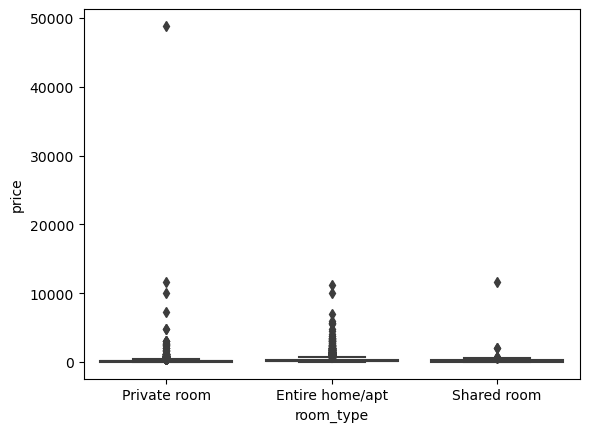

In [28]:
sns.boxplot(data =df,x='room_type',y='price')


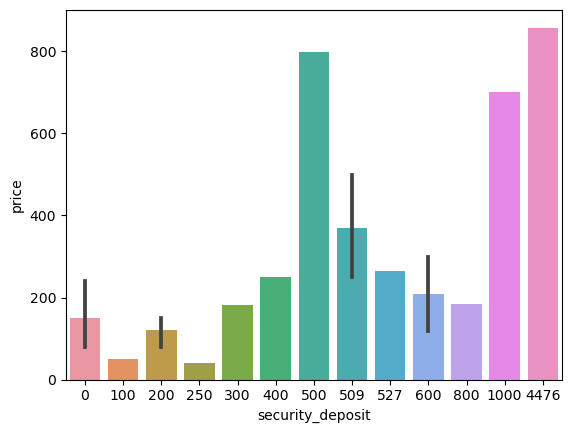

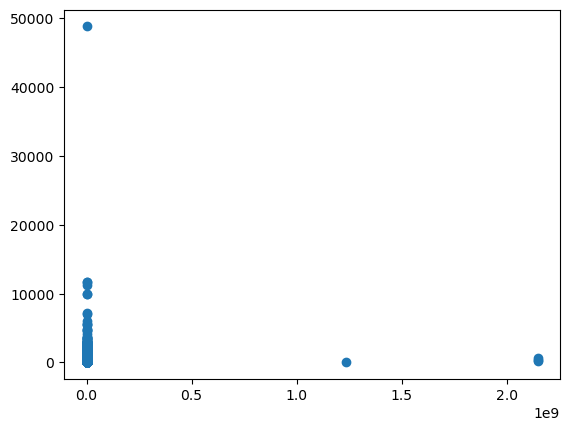

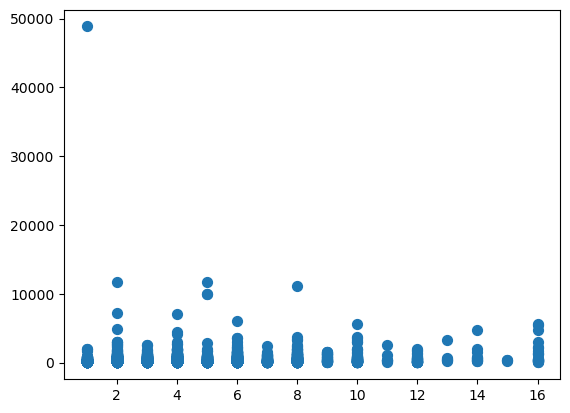

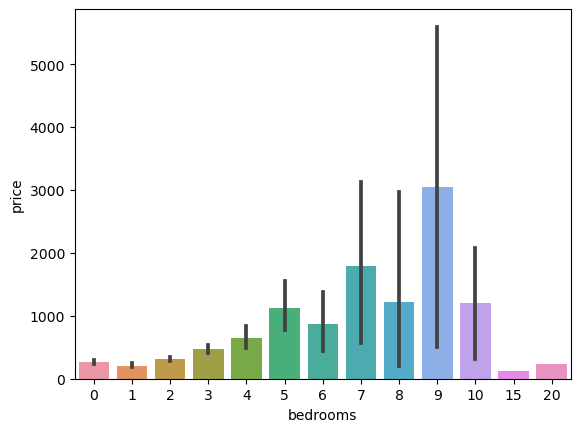

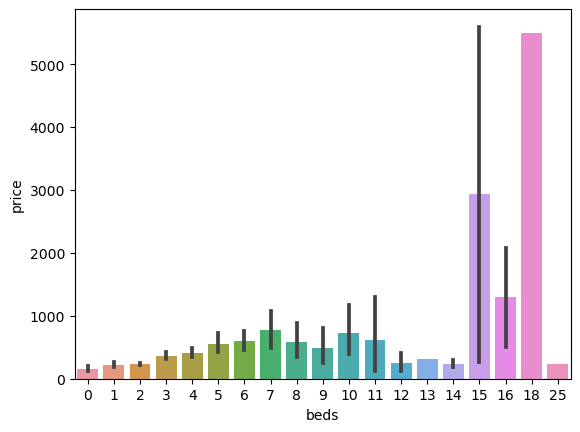

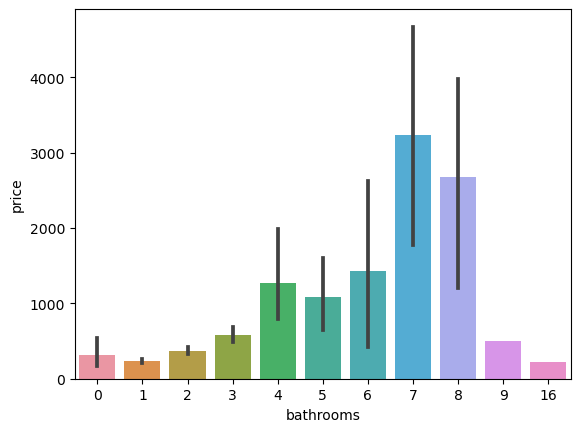

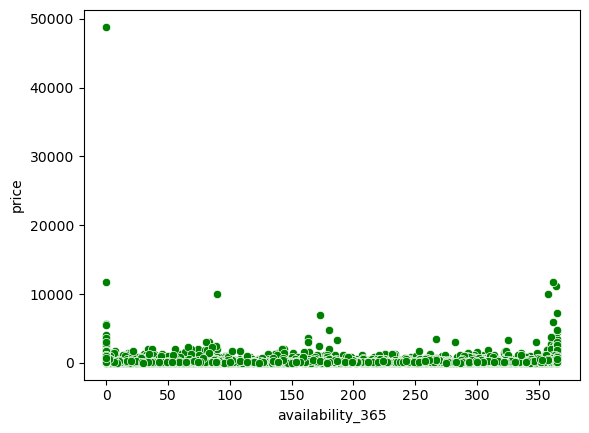

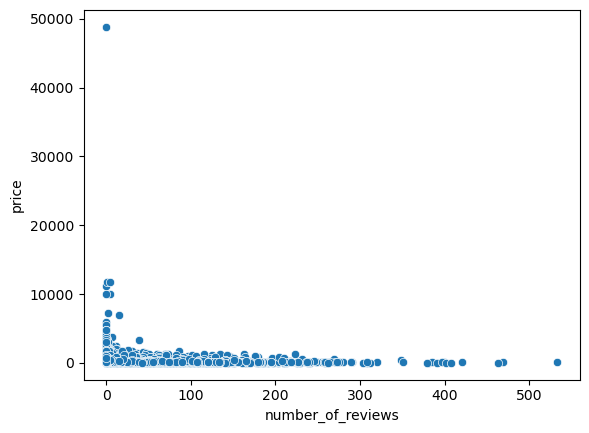

In [30]:
sns.barplot(x=df['security_deposit'][0:50],y=df['price'][0:50])
plt.show()
plt.scatter(df['maximum_nights'],df['price'])
plt.show()
plt.scatter(x=df['accommodates'],y=df['price'],s=50)
plt.show()
sns.barplot(x=df['bedrooms'],y=df['price'])
plt.show()

sns.barplot(x=df['beds'],y=df['price'])
plt.show()
sns.barplot(x=df['bathrooms'],y=df['price'])
plt.show()
sns.scatterplot(x=df['availability_365'],y=df['price'],color="green")
plt.show()
sns.scatterplot(x=df['number_of_reviews'],y=df['price'])
plt.show()

## Interpretations :-
***1.The column 'availability_365' indicates the number of days a property is available for booking within a year. However, the price of a property does not always strongly correlate with its availability. In some cases, properties with low availability may have very high prices compared to those with higher availability.***

***2.column 'number of reviews' indicates the reviews given by customers , but zero review indicates high price because it's a unique property it means the cost is very high. so, price doesnot depends on reviews.***

***3.The column security_deposit indicates the amount of money required as a deposit for security purposes. Generally, a higher security deposit often corresponds with a higher property price, as it usually signifies that the property is a villa, bungalow, or fully furnished accommodation, which justifies a higher cost due to the additional amenities and value provided.***

***4.column 'beds'and 'bathrooms' are high.Typically, properties with a higher number of beds and bathrooms tend to have higher prices. This is because larger properties, which can accommodate more guests and offer greater comfort and convenience, often come with increased costs.***

***5.column maximum_nights. This can indicate that the property is targeting short-term stays, possibly due to high demand for short-term rentals or the property's positioning as a premium, short-term accommodation option. Therefore, properties with lower maximum stay limits may charge higher prices, reflecting their focus on short-term occupancy and potentially higher turnover.***

***6.column 'minimum_nights', When the minimum number of nights is low, it can sometimes lead to higher prices per night. This is because properties that allow shorter stays may cater to guests looking for flexibility, such as tourists or business travelers who need accommodations for only a few nights.***

***7.The column 'accomodates' , the properties that accommodate 2 to 4 guests may have higher prices, likely due to being targeted at small families, couples, or groups looking for more comfort and amenities. Conversely, properties that accommodate a larger number of guests may have a lower price per person, as the cost is spread across more individuals, making it more affordable for larger groups.***